Install dependencies

In [212]:
# pip install pandas
# pip install scikit-learn
# pip install numpy

Importing the dependencies

In [213]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px

Loading data 

In [214]:
df = pd.read_csv('Data/players_20.csv')
# print(df.size)


Data exploration | Data cleaning 

In [215]:
# df.player_positions.value_counts().plot(kind = 'pie')

In [216]:
# Convert the current 27 positions into 4 main position disciplines, Attacker, Midfielder, Defender, Goalkeeper

# First remove commas from the column 
df['player_positions']=df['player_positions'].str.replace(',','')
df['player_positions'] = df['player_positions'].astype(str).str.split().str[0]
#
att = dict.fromkeys(['ST', 'LW', 'RW', 'LS', 'RS', 'CF', 'RF', 'LF'], 'Attacker')
mid = dict.fromkeys(['CM', 'RM', 'LM', 'CAM', 'CDM', 'LCM', 'RCM', 'RDM', 'LDM', 'RAM', 'LAM'], 'Midfielder')
dfnc = dict.fromkeys(['CB', 'LB', 'RB', 'RCB', 'LCB', 'RWB', 'LWB' ], 'Defender')

df.player_positions.replace('GK', 'Goalkeeper', inplace=True)
df.player_positions.replace(att, inplace=True)
df.player_positions.replace(mid, inplace=True)
df.player_positions.replace(dfnc, inplace=True)
# df.to_csv('players_20_commaremoved.csv')

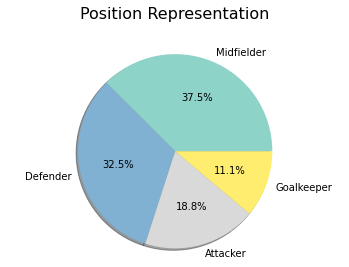

In [217]:
df.player_positions.value_counts().plot(kind = 'pie',
                                autopct = '%0.1f%%',
                                shadow = True,
                                cmap = 'Set3'
                                )
plt.title('Position Representation\n', fontsize = 16 )
plt.xlabel('')
plt.ylabel('')
plt.axis('equal')
plt.show()                                

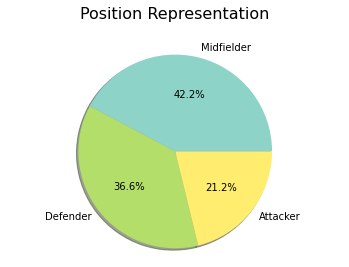

In [218]:
# remove goal keeper from dataset
df = df[df['player_positions'] != 'Goalkeeper']
df.player_positions.value_counts().plot(kind = 'pie',
                                autopct = '%0.1f%%',
                                shadow = True,
                                cmap = 'Set3'
                                )
plt.title('Position Representation\n', fontsize = 16 )
plt.xlabel('')
plt.ylabel('')
plt.axis('equal')
plt.show()

<AxesSubplot:ylabel='position'>

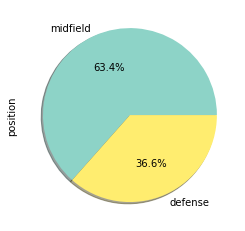

In [219]:
# Combining Midfielder and Attacker into one
df['position'] = df['player_positions'].apply(lambda x: 'defense' if 'Defender' in x else 'midfield')
# df.to_csv('pos.csv')
df.position.value_counts().plot(kind = 'pie',autopct = '%0.1f%%',shadow = True, cmap = 'Set3')


In [220]:
px.scatter(data_frame=df, x='attacking_finishing',y = 'dribbling',color='player_positions')

Filtering and visualizing

In [221]:
# rslt_df = df[df['position'] == 'defense']
# rslt_df[['long_name', 'position']] 


In [222]:
df = df[['position', 'shooting','passing','dribbling','defending']]
print(df.head(5))
X  = df.drop('position', axis=1).values
print(X)
y  = df['position'].values
print(y)

   position  shooting  passing  dribbling  defending
0  midfield      92.0     92.0       96.0       39.0
1  midfield      93.0     82.0       89.0       35.0
2  midfield      85.0     87.0       95.0       32.0
4  midfield      83.0     86.0       94.0       35.0
5  midfield      86.0     92.0       86.0       61.0
[[92. 92. 96. 39.]
 [93. 82. 89. 35.]
 [85. 87. 95. 32.]
 ...
 [35. 44. 45. 48.]
 [35. 47. 47. 45.]
 [32. 51. 45. 47.]]
['midfield' 'midfield' 'midfield' ... 'midfield' 'midfield' 'midfield']


In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, stratify=y)


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

K-Nearest Neighbor Algorithim

In [224]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8699399722949054


Test 

In [225]:
van_deijk = np.array([[60,71,72,91]])
print(knn.predict(van_deijk)) 

ronaldo = np.array([[92,79,86,44]])
print(knn.predict(ronaldo))

benzema = np.array([[86,81,87,39]])
print(knn.predict(benzema))

mbpape = np.array([[88,80,92,36]])
print(knn.predict(mbpape)) 

bruno = np.array([[86,89,84,70]])
print(knn.predict(bruno))

varane = np.array([[49,64,65,87]])
print(knn.predict(varane))

xx = np.array([[54,78,80,81]])
print(knn.predict(xx))

['defense']
['midfield']
['midfield']
['midfield']
['midfield']
['defense']
['defense']


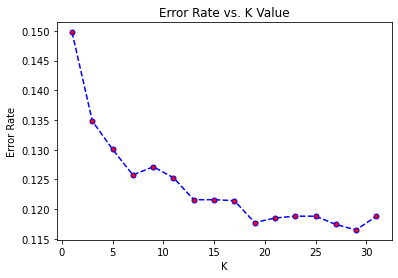

In [226]:
# Identify the best value for K using the elbow method
# The elbow method plots the error rate of a range of K values
error_rate = []

# Set the range of potential K values
# Run KNN for each K in the range
for i in range(1,32,2):
   
    knn = KNeighborsClassifier(n_neighbors = i)
    fit = knn.fit(X_train, y_train)
    pred_i = fit.predict(X_test)
    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))

    
# Plot the error rates and choose a K value
plt.plot(range(1,32,2), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Resources
1. https://charlieojackson.co.uk/python/predicting-football-positions.php?fbclid=IwAR34jqESq_86XzCuVtn7E9SgN4t3nQHhQMWscpjvrthagEG0fufHOCazFjs
2. https://www.kaggle.com/code/bennyf/player-position-classification/notebook?fbclid=IwAR34d_eC313oW0rkNQL3jTb0F_Oozs7zGuVwCCWatZf-gGjsWtu4mlEltN8

Data 
https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset?select=players_22.csv
https://www.kaggle.com/datasets/stefanoleone992/fifa-20-complete-player-dataset
